In [2]:
using DataFrames, CSV, PyPlot

In [3]:
df = Matrix(CSV.read("Displace_Ensemble.csv", DataFrame))

10001×501 Matrix{Float64}:
 0.235243  0.554252  -0.939101    2.80733  …  0.942939  -0.310769    0.0
 0.235243  0.554252  -0.939101    2.80733     0.942939  -0.310769    0.05
 0.235243  0.554252  -0.939101    2.80733     0.942939  -0.310769    0.1
 0.235243  0.554252  -0.939101    2.80733     0.942939  -0.310769    0.15
 0.235243  0.554252  -0.939101    2.80733     0.942939  -0.310769    0.2
 0.235243  0.554251  -0.939101    2.80733  …  0.942939  -0.310769    0.25
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.3
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.35
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.4
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.45
 0.235243  0.554251  -0.939101    2.80733  …  0.942939  -0.310769    0.5
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.55
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.6
 ⋮                

In [4]:
space_N = 20001
scope = 200.0
Δt = 0.05
step_t = 10000

10000

In [5]:
Time = df[:, end]

10001-element Vector{Float64}:
   0.0
   0.05
   0.1
   0.15
   0.2
   0.25
   0.3
   0.35
   0.4
   0.45
   0.5
   0.55
   0.6
   ⋮
 499.45
 499.5
 499.55
 499.6
 499.65
 499.7
 499.75
 499.8
 499.85
 499.9
 499.95
 500.0

In [6]:
Displace = reshape(df[:, 1:end-1], (10000 + 1, 500, 1))

10001×500×1 Array{Float64, 3}:
[:, :, 1] =
 0.235243  0.554252  -0.939101    2.80733  …  0.821298  0.942939  -0.310769
 0.235243  0.554252  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554252  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554252  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554252  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733  …  0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733  …  0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733    

In [7]:
findall(x -> abs(x) >= 200, Displace[:, :, 1])

2-element Vector{CartesianIndex{2}}:
 CartesianIndex(9680, 344)
 CartesianIndex(6970, 417)

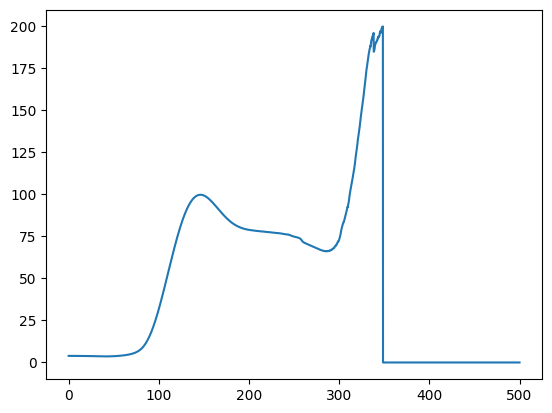

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001021160>

In [8]:
plot(real(Δt).* (0:10000), Displace[:, 417, 1])

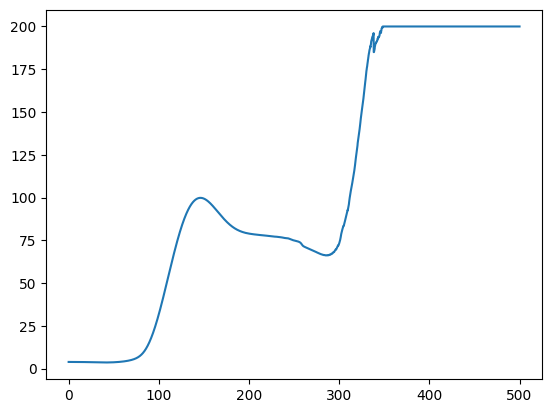

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000010D49D0>

In [9]:
Displace[6970:end, 417] .= 200.0
plot(real(Δt) .* (0:10000), Displace[:, 417, 1])

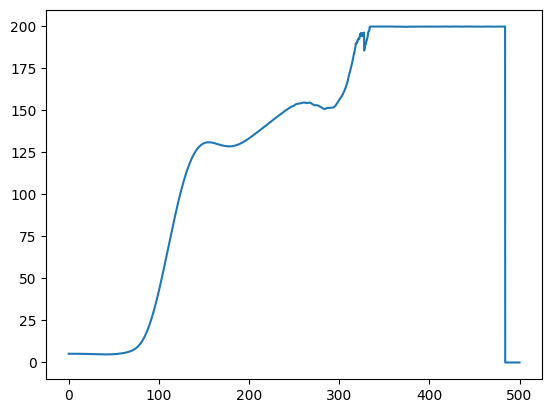

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000109E310>

In [10]:
plot(real(Δt).* (0:10000), Displace[:, 344, 1])

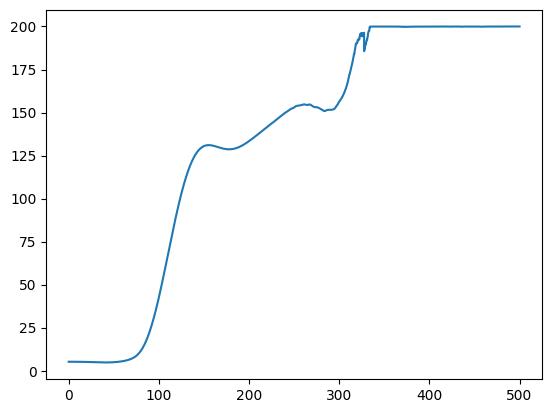

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000012955E0>

In [11]:
Displace[9680:end, 344] .= 200.0
plot(real(Δt) .* (0:10000), Displace[:, 344, 1])

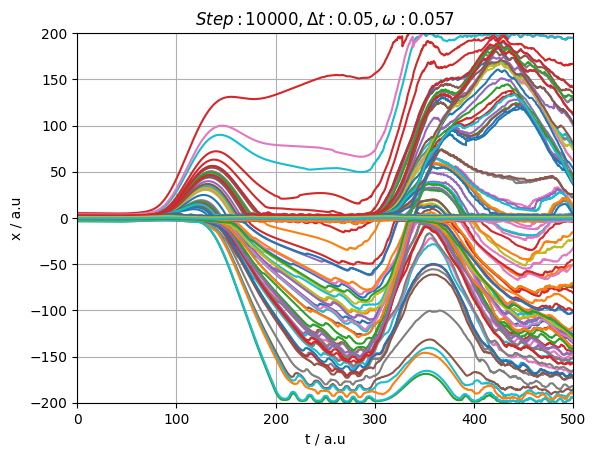

PyObject Text(0.5, 1.0, '$Step:10000,\\Delta t:0.05,\\omega:0.057$')

In [12]:
plot(real(Δt).* (0:step_t), Displace[:, :, 1])
ylim(-200.0, 200.0)
xlim(0, Δt * step_t)
xlabel("t / a.u")
ylabel("x / a.u")
grid()
title(L"Step:10000,\Delta t:0.05,\omega:0.057")

In [13]:
using FFTW
include("Numerical_Diff_DiscreteFunc.jl")
using .Discrete_Func_diff

In [21]:
function HHG(Displace::Array{T,3}) where {T<:AbstractFloat}
    local a, b, c = size(Displace)                               #第一维为对时间的采样, 第二维为系综数,需要进行求和取平均,第三维为电子数
    local Type_0 = eltype(Displace)
    local floor_a = floor(Int, a / 2)
    local fₛ = a / (step_t * real(Δt))
    local Discrete_acc = zeros(Type_0, a, b, c)
    local Discrete_ft_dipole = zeros(Complex{Type_0}, floor_a + 1, c)
    local Discrete_ft_acc = zeros(Complex{Type_0}, floor_a + 1, c)       #预置元素为复数的数组
    local at = zeros(Type_0, a, c)
    local dipole = zeros(Type_0, a, c)


    for j in 1:c, i in 1:b
        Discrete_acc[:, i, j] = Derivative_2(Displace[:, i, j], dL = Δt)
    end

    dipole .= sum(Displace, dims = 2) / b
    at .= sum(Discrete_acc, dims = 2) / b

    Discrete_ft_dipole[:, :] = rfft(dipole, 1)
    Discrete_ft_acc[:, :] = rfft(at, 1)

    return at, dipole, rfftfreq(a, fₛ), Discrete_ft_dipole, Discrete_ft_acc
end

HHG (generic function with 1 method)

In [22]:
at, dipole, frequency, Discrete_ft_dipole, Discrete_ft_acc = HHG(Displace)

([5.932796736084672e-8; 6.00157888815065e-8; … ; 0.21503993895661944; 1.2311163145040926;;], [0.059329133308065975; 0.05932913345818553; … ; -7.504656749183304; -7.5109905595491515;;], [0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018000000000000002  …  9.982000000000001, 9.984, 9.986, 9.988, 9.99, 9.992, 9.994, 9.996, 9.998, 10.0], ComplexF64[-23122.485524651333 + 0.0im; 16706.078205651655 + 945.7518479334824im; … ; 3.776823796398958 - 0.007400111932083009im; 3.770013696402177 + 0.0074448086663975455im;;], ComplexF64[-1.3870808637979573 + 0.0im; -4.0240735849927685 - 2.052693781803076im; … ; 19.80343511661311 + 11.980220889675188im; 34.33165322051991 - 17.151151622122747im;;])

In [ ]:
using NumericalIntegrations

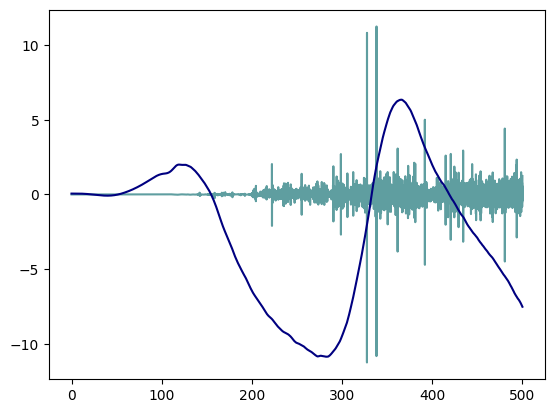

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007D7303A0>

In [31]:
plot(real(Δt) .* (0:step_t), at, color = "cadetblue")
plot(real(Δt) .* (0:step_t), dipole, color = "navy")

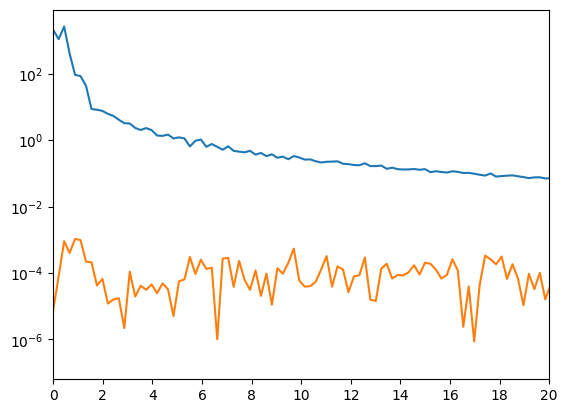

(0.0, 0.1814366351247607)

In [32]:
semilogy(frequency, abs2.(Discrete_ft_dipole ./ (10000 * Δt)))
semilogy(frequency, abs2.(Discrete_ft_acc ./ (10000 * Δt)))
xticks((0.057 / 2pi) * collect(0:2:20), collect(0:2:20))
xlim(0, (0.057 / 2pi) * 20)